In [16]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import ISRIStemmer
from snowballstemmer import stemmer

#### Hand-made Stemmer

In [17]:
#using hand made stemmer
def process_tweet_1(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style etweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', tweet)
    # # removal
    tweet = re.sub(r'#', '', tweet)
    # Remove punctuation
    tweet = re.sub(r'[\u060C\u061B\u061F]', '', tweet)
    # Remove diacritic
    tweet = re.sub(r'[\u064B-\u0652]', '', tweet)
    # yaaa with yaaa with points
    tweet = re.sub(r'\u0649', '\u064A', tweet)
    # Remove tatweel
    tweet = re.sub(r'\u0640', '', tweet)
    # Remove alef with madda
    tweet = re.sub(r'\u0622', '\u0627', tweet)
    # Remove alef with hamza above
    tweet = re.sub(r'\u0623', '\u0627', tweet)
    # Remove alef with hamza below
    tweet = re.sub(r'\u0625', '\u0627', tweet)
    # Remove alef maksura
    tweet = re.sub(r'\u0649', '\u064a', tweet)
    # taa marbota to heh
    tweet = re.sub(r'\u0629', '\u0647', tweet)
    # Remove non-arabic characters
    tweet = re.sub(r'[^\u0621-\u064A]', ' ', tweet)
    # Remove extra spaces
    tweet = re.sub(r'\s+', ' ', tweet)

    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(tweet)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('arabic')]
    return filtered_tokens

#### NLTK Stemmer

In [18]:
#using the nltk stemmer
def process_tweet_2(tweet):
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(tweet)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('arabic')]

    stemmer = ISRIStemmer()
    filtered_tokens = [stemmer.stem(token) for token in filtered_tokens]
    filtered_tokens = [re.sub(r'[^\u0621-\u064A]', '', token) for token in filtered_tokens]
    filtered_tokens = [token for token in filtered_tokens if token != '']

    return filtered_tokens


#### 3rd Party Stemmer

In [19]:
def process_tweet_3(tweet):
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'(.)\1+', r'\1', tweet)
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(tweet)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('arabic')]
    ar_stemmer = stemmer("arabic")
    filtered_tokens = [ar_stemmer.stemWord(token) for token in filtered_tokens]
    filtered_tokens = [re.sub(r'[^\u0621-\u064A]', '', token) for token in filtered_tokens]
    filtered_tokens = [token for token in filtered_tokens if token != '']
    
    return filtered_tokens




#### Testing & Running the Preprocessing on the Dataset

In [20]:
from IPython.utils import io
with io.capture_output() as captured:  
   %run ../../1-Preprocessing/DataInsight/DataInsight.ipynb import x, y1, y2, X, Y1, Y2, X_test

length = len(x)
index = np.random.randint(0, length)
test = x[index]
display(test)
display(' '.join(process_tweet_1(test)))
display(' '.join(process_tweet_2(test)))
display(' '.join(process_tweet_3(test)))

'رئيس شركة الاتحاد للتجارة يتبرع بـ 5 مليون جنيه على الهواء لتحيا مصر لتوفير لقاح كورونا<LF>#على_مسئوليتي  #صدى_البلد https://t.co/B3AxwL7T1B'

'رئيس شركه الاتحاد للتجاره يتبرع مليون علي الهواء لتحيا مصر لتوفير لقاح كورونا علي مسئوليتي صدي البلد'

'رئس شرك تحد جار برع بـ ملي هوء لتح مصر وفر لقح كورو علىمسئوليتي صدىالبلد'

'رييس شرك اتحاد لتجار يتبرع ب مليون هواء لتحي مصر لتوفير لقاح كور علىمسيوليت صدىالبلد'

In [21]:
selector = 3
Preprocessing = {"approach": "Hand-made" if selector==1 else "NLTK" if selector==2 else "Snowball", "max_len": 0}
preprocess_tweet = lambda tweet: process_tweet_1(tweet) if selector==1 else process_tweet_2(tweet) if selector==2 else process_tweet_3(tweet)
x = [preprocess_tweet(tweet) for tweet in x]
X = [preprocess_tweet(tweet) for tweet in X]
X_test = [preprocess_tweet(tweet) for tweet in X_test]
y1, y2 = y1, y2
Y1, Y2 = Y1, Y2

#### Tweet Length Histogram

The average length of the tweets is:  19.44547796222095


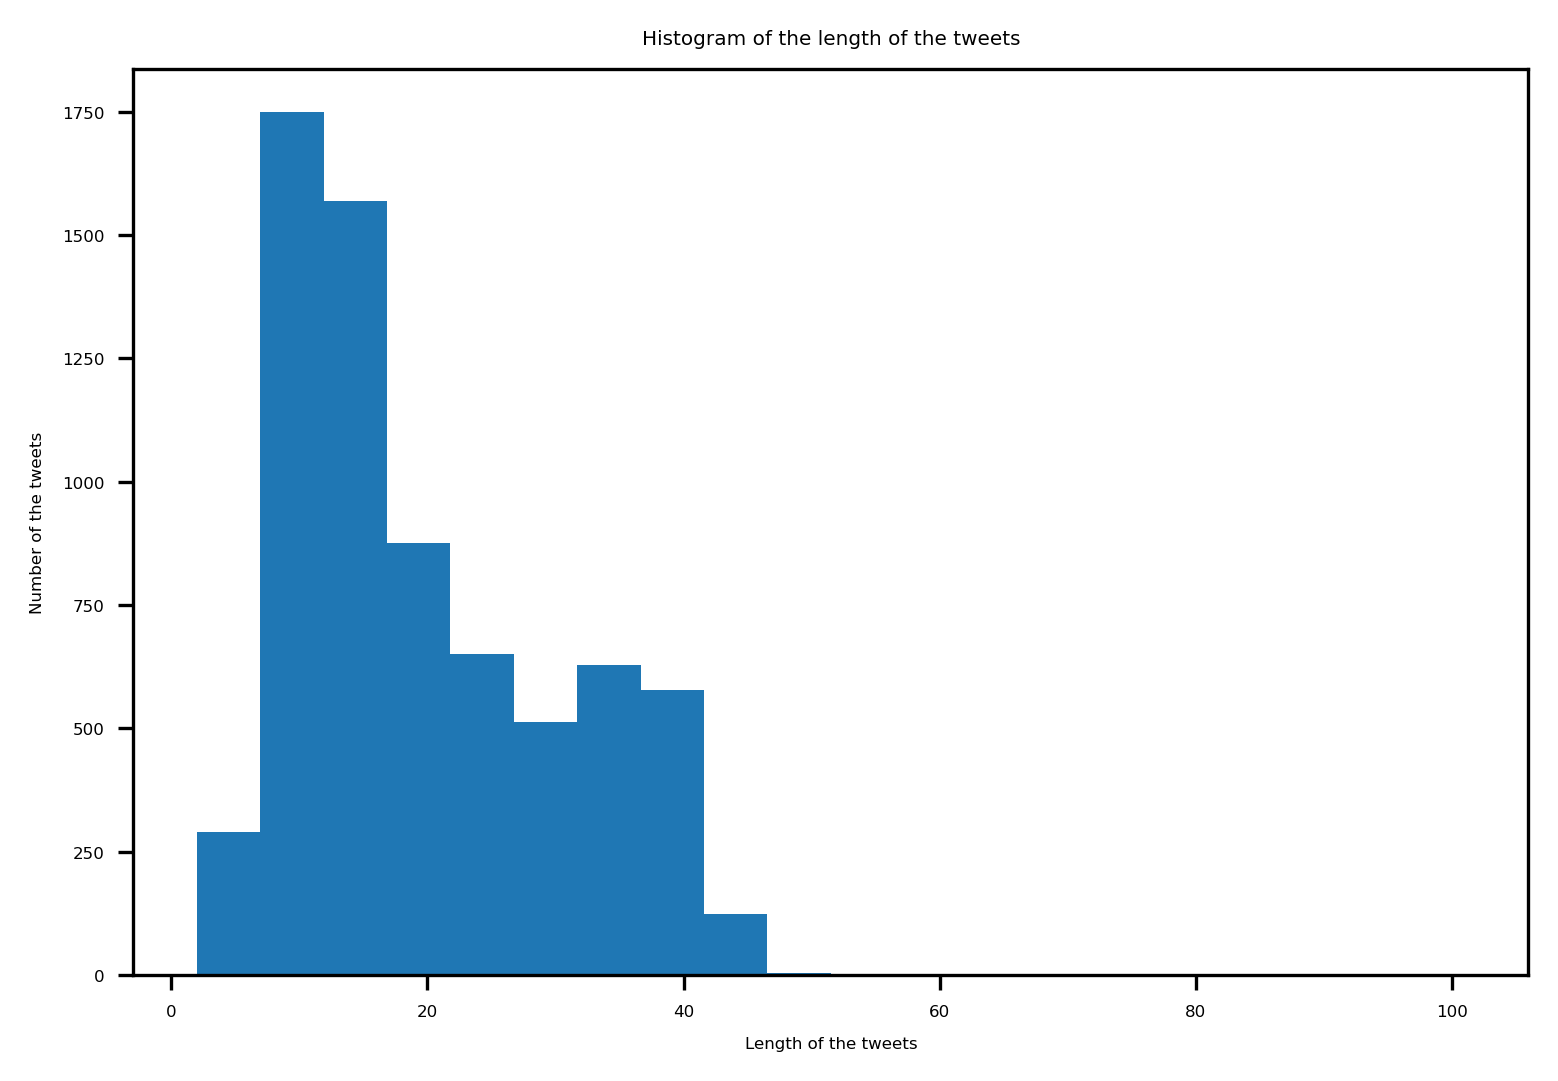

In [22]:
# visualize a histogram of the length of the tweets
hist = [len(tweet) for tweet in x]
# find the   average length of the tweets
avg = np.mean(hist)
print('The average length of the tweets is: ', avg)
plt.hist(hist, bins=20)
plt.title('Histogram of the length of the tweets')
plt.xlabel('Length of the tweets')
plt.ylabel('Number of the tweets')
plt.show()

#### Clipping and Padding Tweets 

In [23]:
# clip the tweets to 30 words and pad the rest with 'pad'
max_len = 30
Preprocessing["max_len"] = max_len
x = [tweet[:max_len] if len(tweet) > max_len else tweet + ['pad'] * (max_len - len(tweet)) for tweet in x]
X = [tweet[:max_len] if len(tweet) > max_len else tweet + ['pad'] * (max_len - len(tweet)) for tweet in X]
X_test = [tweet[:max_len] if len(tweet) > max_len else tweet + ['pad'] * (max_len - len(tweet)) for tweet in X_test]

#### Converting Y to One-hot Vectors then to Discrete 0-Indexed Integers

In [24]:
# Convert y1 and y2 to one hot
y1 = np.array([np.eye(3)[i] for i in y1])
y2 = np.array([np.eye(10)[i] for i in y2])

Y1 = np.array([np.eye(3)[i] for i in Y1])
Y2 = np.array([np.eye(10)[i] for i in Y2])

# Most modells want a discrete 0-indexed integer for the class 
y1, y2 = np.argmax(y1, axis=1), np.argmax(y2, axis=1)
Y1, Y2 = np.argmax(Y1, axis=1), np.argmax(Y2, axis=1)

y1, y2 = np.array(y1), np.array(y2)
Y1, Y2 = np.array(Y1), np.array(Y2)

#### Building the Vocabulary

In [25]:
# build the vocabulary from x and X
def build_vocab(x, X):
    words = []
    for tweet in x + X + X_test:
        words.extend(tweet)

    # vocabulary dictionary
    vocabulary = {word : index for index, word in enumerate(set(words))}
    vocab_statistics = Counter(words)
    display(vocab_statistics.most_common(20))
    print('The size of the vocabulary is: ', len(vocabulary))
    return vocabulary

vocabulary = build_vocab(x, X)
print("Class 0 of Task 0")
meh_0 = build_vocab(np.array(x)[y1==0].tolist(), np.array(X)[Y1==0].tolist())
print("Class 1 of Task 0")
meh_1 = build_vocab(np.array(x)[y1==1].tolist(), np.array(X)[Y1==1].tolist())
print("Class 2 of Task 0")
meh_2 = build_vocab(np.array(x)[y1==2].tolist(), np.array(X)[Y1==2].tolist())

for i in range(10):
    print(f"Class {i} of Task 1")
    meh_0 = build_vocab(np.array(x)[y1==i].tolist(), np.array(X)[Y2==i].tolist())

voc_size = len(vocabulary) 


[('pad', 95665),
 ('لقاح', 7599),
 ('كورونا', 5151),
 ('علي', 2319),
 ('الجرعه', 1229),
 ('الصحه', 1158),
 ('اللقاح', 1155),
 ('ان', 1108),
 ('كوفيد', 975),
 ('الاولي', 962),
 ('يتلقي', 871),
 ('الي', 867),
 ('الله', 803),
 ('تطعيم', 778),
 ('فايزر', 756),
 ('فيروس', 708),
 ('جرعه', 705),
 ('ضد', 664),
 ('عاجل', 512),
 ('اليوم', 488)]

The size of the vocabulary is:  25593
Class 0 of Task 0


[('pad', 13824),
 ('لقاح', 1049),
 ('كورونا', 529),
 ('علي', 335),
 ('ان', 170),
 ('اللقاح', 122),
 ('تطعيم', 101),
 ('الي', 94),
 ('او', 87),
 ('ضد', 81),
 ('اذا', 73),
 ('فايزر', 70),
 ('فيروس', 61),
 ('الصحه', 58),
 ('اللي', 58),
 ('العالم', 58),
 ('امن', 55),
 ('بسبب', 54),
 ('الله', 52),
 ('كوفيد', 50)]

The size of the vocabulary is:  8996
Class 1 of Task 0


[('pad', 76093),
 ('لقاح', 6040),
 ('كورونا', 4393),
 ('علي', 1852),
 ('الجرعه', 1198),
 ('الصحه', 1073),
 ('الاولي', 940),
 ('اللقاح', 893),
 ('كوفيد', 883),
 ('يتلقي', 865),
 ('ان', 814),
 ('الله', 730),
 ('الي', 722),
 ('جرعه', 677),
 ('تطعيم', 647),
 ('فيروس', 620),
 ('فايزر', 566),
 ('ضد', 553),
 ('عاجل', 482),
 ('الثانيه', 464)]

The size of the vocabulary is:  20127
Class 2 of Task 0


[('pad', 5748),
 ('لقاح', 510),
 ('كورونا', 229),
 ('اللقاح', 140),
 ('علي', 132),
 ('ان', 124),
 ('فايزر', 120),
 ('امن', 92),
 ('نريد', 66),
 ('وفاه', 64),
 ('الي', 51),
 ('كوفيد', 42),
 ('الامريكي', 40),
 ('النرويج', 36),
 ('تلقي', 32),
 ('ضد', 30),
 ('تطعيم', 30),
 ('اي', 28),
 ('فيروس', 27),
 ('بسبب', 27)]

The size of the vocabulary is:  4043
Class 0 of Task 1


[('pad', 12374),
 ('لقاح', 948),
 ('كورونا', 483),
 ('علي', 303),
 ('ان', 153),
 ('اللقاح', 111),
 ('تطعيم', 89),
 ('الي', 84),
 ('او', 77),
 ('ضد', 71),
 ('اذا', 65),
 ('فيروس', 59),
 ('فايزر', 59),
 ('اللي', 54),
 ('الصحه', 51),
 ('امن', 48),
 ('بسبب', 48),
 ('الله', 47),
 ('العالم', 47),
 ('كوفيد', 46)]

The size of the vocabulary is:  8335
Class 1 of Task 1


[('pad', 68340),
 ('لقاح', 5432),
 ('كورونا', 3988),
 ('علي', 1641),
 ('الجرعه', 1111),
 ('الصحه', 944),
 ('الاولي', 875),
 ('يتلقي', 854),
 ('كوفيد', 788),
 ('اللقاح', 788),
 ('ان', 707),
 ('الله', 679),
 ('الي', 628),
 ('جرعه', 605),
 ('تطعيم', 571),
 ('فيروس', 558),
 ('فايزر', 510),
 ('ضد', 480),
 ('عاجل', 436),
 ('الثانيه', 417)]

The size of the vocabulary is:  18818
Class 2 of Task 1


[('pad', 11847),
 ('لقاح', 937),
 ('كورونا', 527),
 ('علي', 275),
 ('اللقاح', 199),
 ('ان', 188),
 ('فايزر', 169),
 ('الي', 124),
 ('الصحه', 112),
 ('امن', 109),
 ('كوفيد', 93),
 ('ضد', 91),
 ('تطعيم', 86),
 ('نريد', 73),
 ('الجرعه', 69),
 ('فيروس', 68),
 ('وفاه', 66),
 ('تلقي', 60),
 ('الاولي', 49),
 ('شخص', 47)]

The size of the vocabulary is:  6392
Class 3 of Task 1


[('pad', 181),
 ('لقاح', 18),
 ('كورونا', 8),
 ('علي', 4),
 ('الله', 3),
 ('بكل', 3),
 ('شو', 2),
 ('اي', 2),
 ('علشان', 2),
 ('اول', 2),
 ('الصحه', 2),
 ('اليوم', 2),
 ('يوم', 2),
 ('ان', 2),
 ('فيروس', 2),
 ('سنوات', 2),
 ('ايران', 2),
 ('امن', 2),
 ('تساؤلات', 1),
 ('اخر', 1)]

The size of the vocabulary is:  287
Class 4 of Task 1


[('pad', 1072),
 ('لقاح', 127),
 ('كورونا', 67),
 ('علي', 43),
 ('الجرعه', 36),
 ('كوفيد', 36),
 ('اللقاح', 34),
 ('الله', 31),
 ('ان', 29),
 ('شكرا', 24),
 ('الصحه', 21),
 ('الاولي', 21),
 ('اليوم', 18),
 ('اخذت', 17),
 ('الثانيه', 16),
 ('اخذ', 15),
 ('امن', 12),
 ('تم', 12),
 ('او', 12),
 ('اذا', 11)]

The size of the vocabulary is:  1633
Class 5 of Task 1


[('pad', 940),
 ('لقاح', 79),
 ('كورونا', 57),
 ('علي', 32),
 ('الصحه', 24),
 ('جرعه', 23),
 ('ان', 13),
 ('اللقاح', 13),
 ('عاجل', 12),
 ('الي', 11),
 ('فيروس', 10),
 ('مليون', 10),
 ('الامارات', 10),
 ('وزاره', 9),
 ('كوفيد', 9),
 ('تطعيم', 8),
 ('ضد', 8),
 ('خلال', 7),
 ('فايزر', 6),
 ('العربيه', 6)]

The size of the vocabulary is:  927
Class 6 of Task 1


[('pad', 225),
 ('لقاح', 18),
 ('علي', 9),
 ('نريد', 6),
 ('امن', 6),
 ('كورونا', 6),
 ('او', 4),
 ('ان', 4),
 ('اللقاح', 4),
 ('الي', 4),
 ('الدول', 3),
 ('تطعيم', 3),
 ('التصلب', 3),
 ('نامن', 2),
 ('نزيف', 2),
 ('الاطباء', 2),
 ('الله', 2),
 ('واسعه', 2),
 ('اي', 2),
 ('وكلاء', 2)]

The size of the vocabulary is:  294
Class 7 of Task 1


[('pad', 40),
 ('لقاح', 2),
 ('الي', 2),
 ('فيديو', 1),
 ('متحدث', 1),
 ('الصحه', 1),
 ('الاخباريه', 1),
 ('اخذ', 1),
 ('كورونا', 1),
 ('شرطا', 1),
 ('للسماح', 1),
 ('بالسفر', 1),
 ('الخارج', 1),
 ('اتوقع', 1),
 ('بياخذون', 1),
 ('اللقاح', 1),
 ('عشان', 1),
 ('السفر', 1),
 ('فايزر', 1)]

The size of the vocabulary is:  19
Class 8 of Task 1


[('pad', 157),
 ('لقاح', 13),
 ('كورونا', 6),
 ('علي', 5),
 ('ان', 5),
 ('اللقاح', 4),
 ('اكثر', 3),
 ('تطعيم', 3),
 ('اللي', 3),
 ('الناس', 2),
 ('ناحيه', 2),
 ('جرعه', 2),
 ('المتحده', 2),
 ('التساؤل', 2),
 ('وفاه', 2),
 ('فايزر', 2),
 ('انا', 2),
 ('نائبه', 2),
 ('الله', 2),
 ('عدم', 2)]

The size of the vocabulary is:  249
Class 9 of Task 1


[('pad', 489),
 ('لقاح', 25),
 ('كورونا', 8),
 ('علي', 7),
 ('ان', 7),
 ('تطعيم', 7),
 ('ضد', 6),
 ('التفكير', 5),
 ('الي', 4),
 ('امن', 4),
 ('الا', 4),
 ('العالم', 4),
 ('محتاجين', 3),
 ('يقاوم', 3),
 ('الافراط', 3),
 ('او', 3),
 ('الوباء', 3),
 ('نريد', 3),
 ('الدكتور', 3),
 ('مليون', 3)]

The size of the vocabulary is:  461
